## BDS HW 3

In [1]:
!pip install requests
!pip install bs4
!pip install csv
!pip install PyPDF2
!pip install tika
!pip install tqdm
!pip install pandas
!pip install numpy

Processing /Users/joshloesch/Library/Caches/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca/bs4-0.0.1-py3-none-any.whl
ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv
Processing /Users/joshloesch/Library/Caches/pip/wheels/b1/1a/8f/a4c34be976825a2f7948d0fa40907598d69834f8ab5889de11/PyPDF2-1.26.0-py3-none-any.whl
Processing /Users/joshloesch/Library/Caches/pip/wheels/75/66/8b/d1acbac7d49f3d98ade76c51ae5d72cec1866131a3b1ad9f82/tika-1.24-py3-none-any.whl


In [2]:
# imports
import requests 
from bs4 import BeautifulSoup
import csv
import os
import PyPDF2
from tika import parser
from tqdm import tqdm
import numpy as np
from math import log, e
import pandas as pd

In [4]:
%config Completer.use_jedi = False

In [5]:
from IPython.core.debugger import set_trace

In [5]:
# URL from which pdfs to be downloaded
url = "http://proceedings.mlr.press/v70/"
  
# Requests URL and get response object
response = requests.get(url)
  
# Parse text obtained
soup = BeautifulSoup(response.text, 'html.parser')
  
# Find all hyperlinks present on webpage
links = soup.find_all('a')
  
i = 0
  
# From all links check for pdf link and
# if present download file
# check if links already exists
directory = os.getcwd()
for link in tqdm(links):
    if ('.pdf' in link.get('href', [])):
        i += 1
  
        # Get response object for link
        response = requests.get(link.get('href'))
  
        # Write content in pdf file
        # check if pdf exists already
        if not os.path.exists(directory + "/pdf"+str(i)+".pdf"):
            pdf = open("pdf"+str(i)+".pdf", 'wb')
            pdf.write(response.content)
            pdf.close()
  
print("All PDF files downloaded")

100%|██████████| 1190/1190 [06:18<00:00,  3.14it/s]

All PDF files downloaded


In [6]:
directory = os.getcwd()
allwords = []
for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".pdf"):
        rawText = parser.from_file(filename)
        try:
            pdf_words = rawText['content'].split()
            allwords.extend([x.strip().lower() for x in pdf_words if x.strip().isalpha()])
        except AttributeError:
            print(f'There was an error with file: {filename}')

  8%|▊         | 61/731 [00:07<00:48, 13.67it/s]

There was an error with file: pdf489.pdf


100%|██████████| 731/731 [01:16<00:00,  9.61it/s]


In [7]:
# clean words in allwords
with open('words_dictionary.json') as json_file:
    eng_dict = json.load(json_file)
    allwords_clean = []
    for word in allwords:
        if word.lower() in eng_dict:
            allwords_clean.append(word)

# save all words clean
text_file = open('all _words_clean.txt', 'w')
for elem in allwords_clean:
    text_file.write(elem+'\n')
text_file.close()

In [8]:
print(f'The reduced word list after cleaning is: {len(allwords_clean)}\nFrom the original: {len(allwords)}')

The reduced word list after cleaning is: 2779275
From the original: 2935198


1. What are the top 10 common words in the ICML papers?

In [9]:
# find the top 10 words
from collections import Counter

def getTop10(lst):
    counted = Counter(lst)
    return counted.most_common(10)

most_common = getTop10(allwords_clean)

In [10]:
print(f'The most common words used are:\n {most_common}')

The most common words used are:
 [('the', 208248), ('of', 103616), ('and', 88682), ('in', 69671), ('a', 67104), ('to', 65595), ('is', 56275), ('for', 52053), ('we', 51700), ('that', 36713)]


2. Let Z be a randomly selected word in a randomly selected ICML paper. Estimate the entropy of Z.

In [11]:
def entropy(items, base=None):
    n_items = len(items)
    
    if n_items <= 1:
        return 0
    
    value, counts = np.unique(items, return_counts=True)
    probs = counts / n_items
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.

    # Compute entropy
    base = e if base is None else base
    for i in probs:
        ent -= i * log(i, base)

    return ent

In [12]:
print(entropy(allwords_clean))

6.441831866181281


3. Synthesize a random paragraph using the marginal distribution over words.

In [13]:
# create a DF with marginal distrabution probabilities and words
counted_words = Counter(allwords_clean)
marginal_dist_words = {}
n_words = len(allwords_clean)
for key, value in counted_words.items():
    marginal_dist_words[key] = value/n_words

In [14]:
marginal_dist_words_df = pd.DataFrame(marginal_dist_words.items(), columns=['word', 'distrabution'])

In [15]:
sampled_words = (marginal_dist_words_df.sample(n=10, weights='distrabution')['word']).to_list()

In [16]:
sentence = ''
for word in sampled_words:
    sentence += word+' '
sentence

'of is can research we and in the above cording '

Problem 3: More on Kaggle Advanced Regression.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [18]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [19]:
null_values = train_raw.isnull().sum()
null_values[null_values > 0]

NameError: name 'train_raw' is not defined

In [ ]:
train.dtypes

In [ ]:
# data pipeline
# 1. label encode categorical values
# 2. one-hot encode label encoded values
# 3. use PCA for dim reduction
# 4. XGBoost with RandomizedSearchCV to find best hyperperameters

In [ ]:
# impute for categorical values and numeric values
def get_categorical_cols(df):
    cols = df.columns
    num_cols = df._get_numeric_data().columns
    return list(set(cols) - set(num_cols))

def get_numeric_cols(df):
    num_cols = df._get_numeric_data().columns
    return num_cols

def impute_data(df):
    # impute categorical data
    cat_cols = get_categorical_cols(df)
    for col in cat_cols:
        df[col] = np.where(df[col].isnull(), "Unknown", df[col])
        
    # impute numeric data with interpolation
    num_cols = get_numeric_cols(df)
    for col in num_cols:
        df[col].interpolate(method='linear', direction = 'forward', inplace=True) 
        
    return df

In [ ]:
imputed_df_test = impute_data(test)
imputed_df_train = impute_data(train)

In [ ]:
imputed_df_train.columns

Dropping columns:
1. PoolQC
2. Fence
3. MiscFeature
4. Alley
5. ID

In [ ]:
def drop_cols(df):
    cols = ['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'Id']
    res = df.drop(columns=cols, axis=1)
    return res

In [ ]:
dropped_df_train = drop_cols(imputed_df_train)
dropped_df_test = drop_cols(imputed_df_test)

In [ ]:
dropped_df_test.columns

In [ ]:
dropped_df_train.columns

One-hot encoding categorical values

In [ ]:
cat_cols_train = get_categorical_cols(dropped_df_train)
cat_cols_test = get_categorical_cols(dropped_df_test)
dum_df_train = pd.get_dummies(dropped_df_train, cat_cols_train)
dum_df_test = pd.get_dummies(dropped_df_test, cat_cols_test)

In [ ]:
y_train = dum_df_train['SalePrice']
dum_df_train.drop(columns=['SalePrice'], axis=1, inplace=True)

In [ ]:
aligned_train_X, aligned_test_X = dum_df_train.align(dum_df_test, join='right', axis=1)

In [ ]:
len(aligned_train_X.columns)

In [ ]:
len(aligned_test_X.columns)

Feature Normalization

In [ ]:
# replace null values in one-hot encoded alignment with 0
test2 = pd.Series(np.isfinite(aligned_train_X).all())
null_categories = list(test2[test2 == False].index)

for col in null_categories:
    aligned_train_X[col] = np.where(aligned_train_X[col].isnull(), 0, aligned_train_X[col])

In [ ]:
test3 = pd.Series(np.isfinite(aligned_train_X).all())
list(test3[test3 == False].index)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(aligned_train_X)
X_test = scaler.transform(aligned_test_X)

PCA Feature Extraction

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(X_train)
print(pca.explained_variance_ratio_)

The explained variance for each PC is very small, this is not a good representation of the data

#### XGBoost Ensemble method

In [ ]:
import xgboost as xgb
from sklearn.metrics import f1_score

In [ ]:
xgb_clf = xgb.XGBClassifier(objective="reg:logistic")
xgb_clf.fit(X_train, y_train)

In [ ]:
y_train_preds = xgb_clf.predict(X_train)
y_test_preds = xgb_clf.predict(X_test)
print("Training F1 Micro Average: ", f1_score(y_train, y_train_preds, average = "micro"))

In [ ]:
len(y_test_preds)

In [ ]:
len(test)

In [ ]:
ids = test['Id']
data = {'Id': ids, 'SalePrice': y_test_preds}

In [ ]:
# export predictions
export_series = pd.DataFrame(data=data)
export_series.to_csv('hw3_XGBoost1.csv', columns=['Id', 'SalePrice'], index=False)

More feature engineering
1. Remove highly correlated features
2. preform XGBoost again

In [ ]:
test2 = pd.Series(np.isfinite(aligned_train_X).all())
null_categories = list(test2[test2 == False].index)

for col in null_categories:
    aligned_train_X[col] = np.where(aligned_train_X[col].isnull(), 0, aligned_train_X[col])

In [ ]:
# find highly correltated features
threshold = 0.9
X_train_df = pd.DataFrame(aligned_train_X, columns=aligned_train_X.columns)
corr_matrix = X_train_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [ ]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

In [ ]:
X_train = aligned_train_X.drop(columns=to_drop)
X_test = aligned_test_X.drop(columns=to_drop)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
xgb_clf = xgb.XGBClassifier(objective="reg:logistic")
xgb_clf.fit(X_train_std, y_train)

In [ ]:
feat_importances  = pd.Series(xgb_clf.feature_importances_, index=X_train.columns)

In [ ]:
important_features_20 = feat_importances.nlargest(20)

In [ ]:
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
y_train_preds = xgb_clf.predict(X_train_std)
y_test_preds = xgb_clf.predict(X_test_std)
print("Training F1 Micro Average: ", f1_score(y_train, y_train_preds, average = "micro"))

In [ ]:
ids = test['Id']
data = {'Id': ids, 'SalePrice': y_test_preds}

In [ ]:
export_series = pd.DataFrame(data=data)
export_series.to_csv('hw3_XGBoost2.csv', columns=['Id', 'SalePrice'], index=False)

Using RandomizeCV with XGBoost to tune hyperperameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = xgb.XGBClassifier(tree_method = "auto", predictor = "gpu_predictor", objective = "reg:logistic")

# Create parameter grid
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500]}

# Create RandomizedSearchCV Object
# xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1_micro",
#                              cv = 7, verbose = 3, random_state = 40)

In [ ]:
# model_xgboost = xgb_rscv.fit(X_train_std, y_train)

In [ ]:
#  model_xgboost.best_estimator_

In [ ]:
# y_pred_XGBoostCV = model_xgboost.predict(X_test_std)

In [ ]:
# ids = test['Id']
# data = {'Id': ids, 'SalePrice': y_pred_XGBoostCV}

In [ ]:
# export_series = pd.DataFrame(data=data)
# export_series.to_csv('hw3_XGBoost3.csv', columns=['Id', 'SalePrice'], index=False)

Using MLP Regressor (Did not work)

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
# regr = MLPRegressor(random_state=1, max_iter=1000000, verbose=True).fit(X_train_std, y_train)

### From Ihsan and Vennela

In [16]:
import requests 
from bs4 import BeautifulSoup
import csv
import os
import PyPDF2
from tika import parser
from tqdm import tqdm
import numpy as np
from math import log, e
import pandas as pd

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [4]:
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [5]:
all_data.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [6]:
train["SalePrice"] = np.log1p(train["SalePrice"])

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [7]:
original_train = np.expm1(train['SalePrice'])

In [8]:
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())

In [9]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [10]:
import xgboost as xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=200,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=360, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

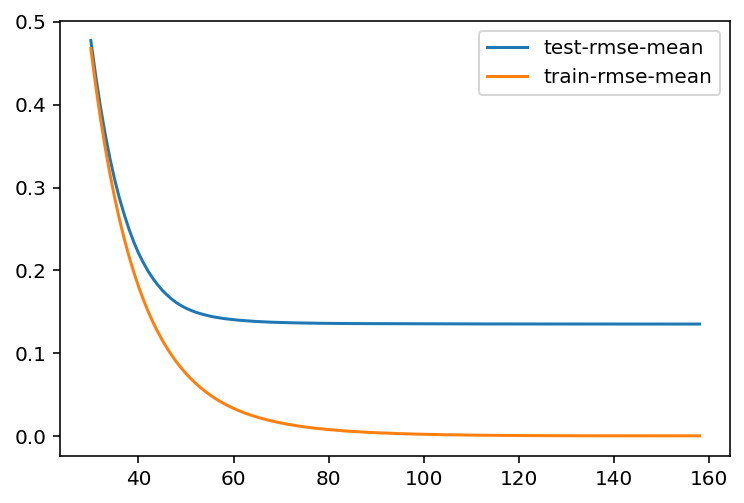

In [12]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":200, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=200, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

In [13]:
y_pred = model_xgb.predict(X_test)

In [14]:
y_pred

array([11.704708, 11.980767, 12.136197, ..., 11.932596, 11.618661,
       12.366938], dtype=float32)

In [15]:
y_pred_orig = np.expm1(y_pred)

In [25]:
## Export csv
test_ids = test['Id']
data = {'Id': test_ids, 'SalePrice': y_pred_orig}
submission = pd.DataFrame(data=data)
submission.to_csv('submission_kaggle_1.csv', index=False)

Feature removal and tree depth reduction

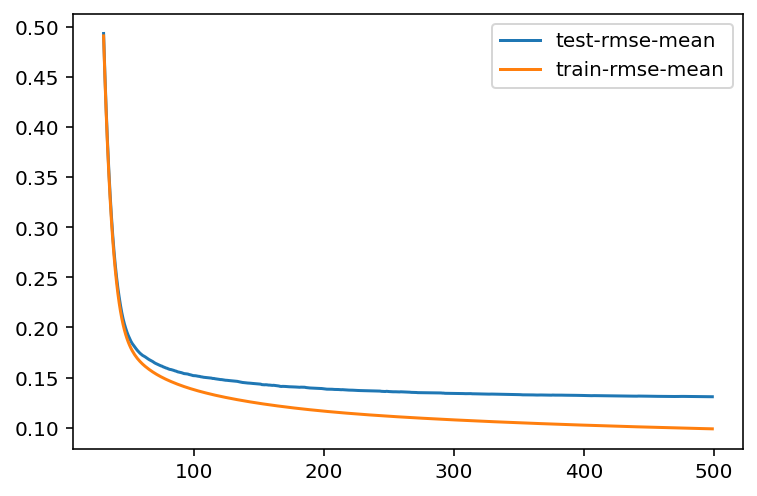

In [33]:
params = {"max_depth":1, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()
model_xgb = xgb.XGBRegressor(n_estimators=50, max_depth=1, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)
pred_y = model_xgb.predict(X_test)

pred_y_inv = np.expm1(pred_y)

In [34]:
## Export csv
test_ids = test['Id']
data = {'Id': test_ids, 'SalePrice': pred_y_inv}
submission = pd.DataFrame(data=data)
submission.to_csv('submission_kaggle_2.csv', index=False)

Blending and stacking

In [6]:
import requests 
from bs4 import BeautifulSoup
import csv
import os
import PyPDF2
from tika import parser
from tqdm import tqdm
import numpy as np
from math import log, e
import pandas as pd

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline
%config Completer.use_jedi = False

from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("Train set size:", train.shape)
print("Test set size:", test.shape)
print('START data processing', datetime.now(), )

Train set size: (1460, 81)
Test set size: (1459, 80)
START data processing 2021-09-26 15:12:07.953353


In [8]:
train_ID = train['Id']
test_ID = test['Id']
# Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

In [9]:
train = train[train.GrLivArea < 4500]
train.reset_index(drop=True, inplace=True)

In [10]:
train["SalePrice"] = np.log1p(train["SalePrice"])
y = train.SalePrice.reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

features = pd.concat([train_features, test_features]).reset_index(drop=True)
print(features.shape)

(2917, 79)


In [11]:
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

features['Functional'] = features['Functional'].fillna('Typ')
features['Electrical'] = features['Electrical'].fillna("SBrkr")
features['KitchenQual'] = features['KitchenQual'].fillna("TA")
features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

features["PoolQC"] = features["PoolQC"].fillna("None")

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    features[col] = features[col].fillna(0)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    features[col] = features[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna('None')

features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

objects = []
for i in features.columns:
    if features[i].dtype == object:
        objects.append(i)

features.update(features[objects].fillna('None'))

features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [12]:
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics.append(i)
features.update(features[numerics].fillna(0))

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics2.append(i)

skew_features = features[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

features = features.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

features['YrBltAndRemod']=features['YearBuilt']+features['YearRemodAdd']
features['TotalSF']=features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

features['Total_sqr_footage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                                 features['1stFlrSF'] + features['2ndFlrSF'])

features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                               features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))

features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                              features['EnclosedPorch'] + features['ScreenPorch'] +
                              features['WoodDeckSF'])

/Users/joshloesch/opt/anaconda3/envs/BDS_New/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/joshloesch/opt/anaconda3/envs/BDS_New/lib/python3.8/site-packages/scipy/stats/stats.py:4053: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [13]:
# simplified features
features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

print(features.shape)
final_features = pd.get_dummies(features).reset_index(drop=True)
print(final_features.shape)

X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(X):, :]

print('X', X.shape, 'y', y.shape, 'X_sub', X_sub.shape)

outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
overfit.append('MSZoning_C (all)')

X = X.drop(overfit, axis=1).copy()
X_sub = X_sub.drop(overfit, axis=1).copy()

print('X', X.shape, 'y', y.shape, 'X_sub', X_sub.shape)

(2917, 86)
(2917, 333)
X (1458, 333) y (1458,) X_sub (1459, 333)
X (1453, 331) y (1453,) X_sub (1459, 331)


In [ ]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import RidgeCV, ElasticNetCV, LassoCV
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor

#### ML #####
from sklearn.model_selection import KFold

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y,
                                    scoring="neg_mean_squared_error",
                                    cv=kfolds))
    return (rmse)

# setup models    
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas=alphas_alt, cv=kfolds))

lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas=alphas2,
                              random_state=42, cv=kfolds))

elasticnet = make_pipeline(RobustScaler(),
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas,
                                        cv=kfolds, l1_ratio=e_l1ratio))
                                        
svr = make_pipeline(RobustScaler(),
                      SVR(C= 20, epsilon= 0.008, gamma=0.0003,))


gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =42)

lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1)

xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet,
                                            gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

                         
score = cv_rmse(ridge)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )
                         
score = cv_rmse(lightgbm)
print("Lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("GradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

Kernel Ridge score: 0.1024 (0.0143)
 2021-09-26 15:12:30.497537
Lasso score: 0.1031 (0.0147)
 2021-09-26 15:12:38.314376
ElasticNet score: 0.1031 (0.0149)
 2021-09-26 15:13:14.515365
